In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from optical_flow import OpticalFlow, parse_args

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
args = parse_args()
args.weights = '/mnt/disks/datastorage/weights/FlowNet2_checkpoint.pth.tar'
args.images = [
    '/mnt/disks/datastorage/MPI-Sintel/training/final/alley_1/frame_0001.png',
    '/mnt/disks/datastorage/MPI-Sintel/training/final/alley_1/frame_0002.png'
]

Parsing Arguments
  [0.582s] fp16: False
  [0.582s] fp16_scale: 1024.0
  [0.582s] images: None
  [0.582s] inference_size: [-1, -1]
  [0.582s] loss: L1Loss
  [0.583s] model: FlowNet2
  [0.583s] model_batchNorm: False
  [0.583s] model_div_flow: 20.0
  [0.583s] no_cuda: False
  [0.583s] number_gpus: 1
  [0.583s] rgb_max: 255.0
  [0.583s] seed: 1
  [0.583s] weights: None
  [0.583s] Operation finished



In [3]:
print('Weights: {}'.format(args.weights))
print('Images: {}'.format(args.images))

Weights: /mnt/disks/datastorage/weights/FlowNet2_checkpoint.pth.tar
Images: ['/mnt/disks/datastorage/MPI-Sintel/training/final/alley_1/frame_0001.png', '/mnt/disks/datastorage/MPI-Sintel/training/final/alley_1/frame_0002.png']


Building FlowNet2 model
  [3.878s] Number of parameters: 162518834
  [3.878s] Initializing CUDA
  [7.535s] Parallelizing
  [7.538s] Loading checkpoint /mnt/disks/datastorage/weights/FlowNet2_checkpoint.pth.tar
  [8.325s] Loaded checkpoint /mnt/disks/datastorage/weights/FlowNet2_checkpoint.pth.tar (at epoch 0)
  [8.325s] Operation finished

Performing inference
  [0.000s] Preprocessing
  [0.082s] Inference Input: [3, 2, 384, 1024]


/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


  [0.624s] [tensor(1.6328, device='cuda:0'), tensor(2.9246, device='cuda:0')]
  [0.783s] Operation finished



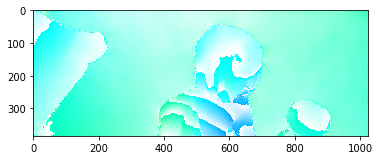

In [4]:
of = OpticalFlow(args)
output = of.run(args.images)
of.display_flow(output)